In [6]:
# 🧪 Exploratory Data Analysis: Down Syndrome Facial Image Dataset

# This notebook explores the dataset used for classifying facial images as either Down Syndrome or Healthy. We visualize image samples, examine class balance, and prepare the dataset for training by resizing, normalizing, and splitting into train/val/test sets.


In [12]:
import os
import matplotlib.pyplot as plt
import random
import shutil
from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split

In [13]:
DATA_DIR = Path("../data")
CLASSES = [cls for cls in os.listdir(DATA_DIR) if not cls.startswith('.')]
CLASSES.sort()
print("Classes:", CLASSES)


Classes: ['downSyndrome', 'healthy']


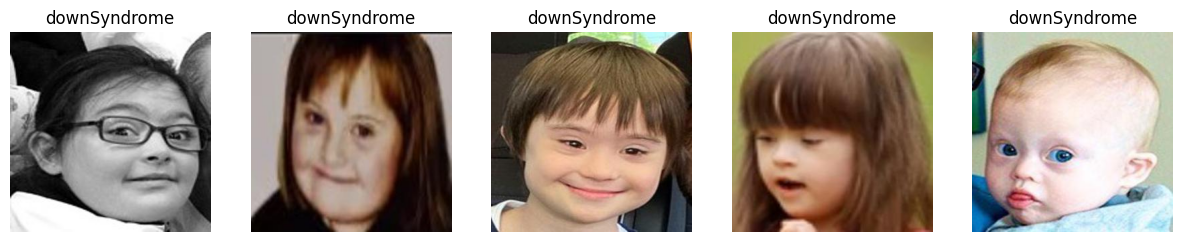

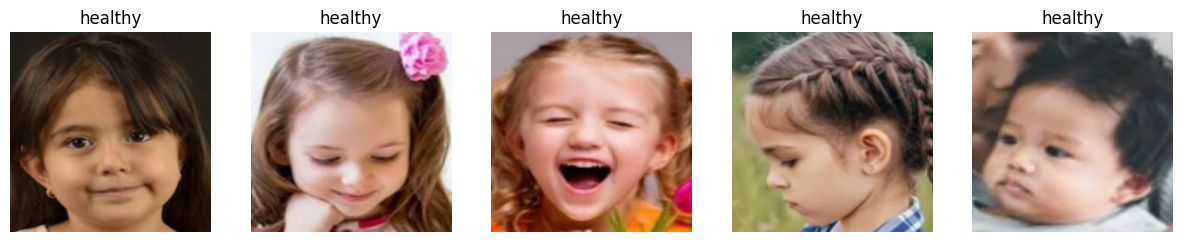

In [14]:
def show_images(class_name, num_images=5):
    class_dir = DATA_DIR / class_name
    images = os.listdir(class_dir)
    sample_imgs = random.sample(images, num_images)
    
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_imgs):
        img_path = class_dir / img_name
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.show()

for cls in CLASSES:
    show_images(cls, num_images=5)



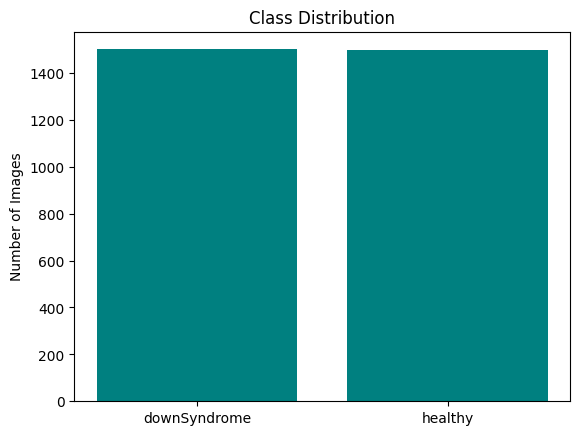

{'downSyndrome': 1501, 'healthy': 1500}


In [15]:
class_counts = {}
for cls in CLASSES:
    class_counts[cls] = len(os.listdir(DATA_DIR / cls))

plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

print(class_counts)

In [16]:
all_images = []
all_labels = []

for cls in CLASSES:
    img_dir = DATA_DIR / cls
    for img in os.listdir(img_dir):
        all_images.append(img_dir / img)
        all_labels.append(cls)

# First split train vs temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    all_images, all_labels, test_size=0.3, stratify=all_labels, random_state=42)

# Then split temp into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

Train: 2100, Val: 450, Test: 451
